In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
# Read the file "Advertising.csv" as a dataframe

df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Normalize using MinMaxScaler
x_col = ["TV","Radio","Newspaper"]
scaler = MinMaxScaler()
df[x_col] = scaler.fit_transform(df[x_col])

In [4]:
# Select a subdataframe of predictors

X = df.drop(['Sales'],axis=1)

# Select the response variable

y = df['Sales']

In [5]:
#Fit a linear regression model

lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [6]:
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

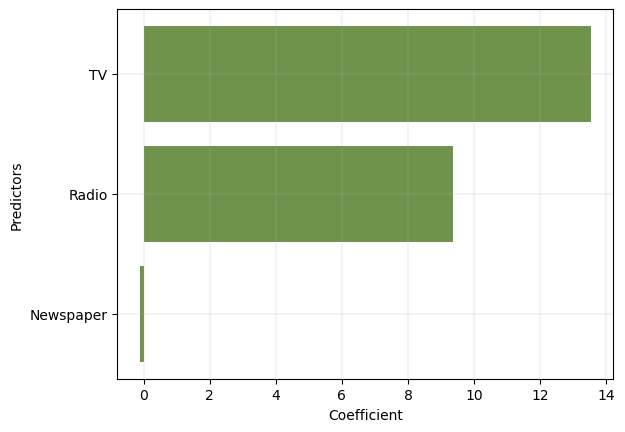

In [7]:
# Use the helper code below to visualise your coefficients

fig, ax = plt.subplots()
ax.barh(predictors,coefficients, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()

In [8]:
# Helper function
# t statistic calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)#,where=stds!=0)

In [9]:
# We now bootstrap for numboot times to find the distribution for the coefficients
coef_dist = []
numboot = 1000
for i in range(numboot):
    # This is another way of making a bootstrap using df.sample method. 
    # Take frac=1 and replace=True to get a bootstrap.
    df_new = df.sample(frac=1,replace=True)
    
    X = df_new.drop('Sales',axis=1)
    y = df_new['Sales']
    
    # Fit a linear model
    lreg = LinearRegression()
    lreg.fit(X, y)
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [10]:
# We use the helper function from above to find the T-test values

tt = get_t(coef_dist)
n = df.shape[0]

In [11]:
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))

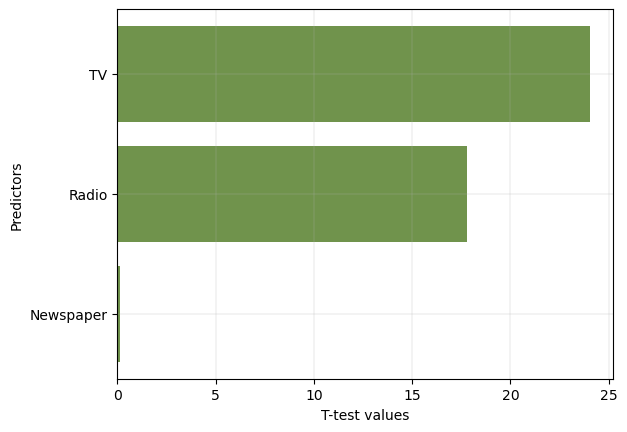

In [12]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show()

In [13]:
### edTest(test_conf) ###
# We now go from t-test values to p values using scipy.stats T-distribution function

pval = stats.t.sf(tt, n-1)*2

# here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# where CDF is the Cumulative Distribution Function 
# We also multiply by two because its a two tailed test.
# Please refer to lecture notes for more information

# Since p values are in reversed order, we find the 'confidence' which is 1-p

conf = 1-pval

In [14]:
conf_dict = dict(zip(df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(),key=lambda x:x[1])))

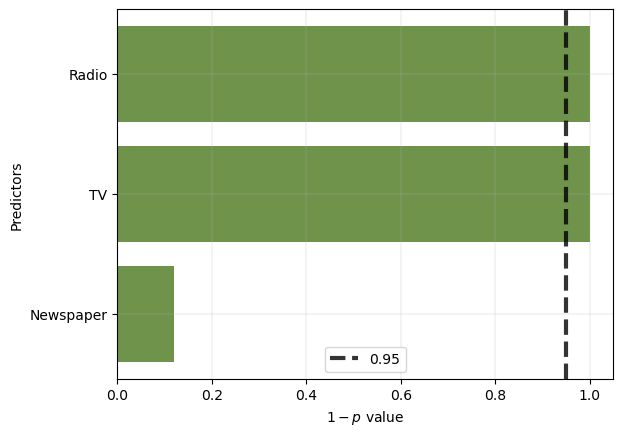

In [15]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()

ax.barh(predictors,confs, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()

## ⏸ Relevance of predictors

You may have observed above that `TV` and `radio` are significant but `newspaper` advertising is not.
Re-run the entire exercise but drop `radio` from the analysis by using the following snippet.

```
df = df.drop(['radio'],axis=1)
```

* Is `newspaper` still irrelevant by your analysis? Why? or why not?